In [13]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import pandas as pd


# Task 1.1: Load the dataset
try:
    # Replace 'your_dataset.csv' with the path to your CSV file
    iris = load_iris()
    df = pd.read_csv('/content/drive/MyDrive/iris.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: The file was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Dataset loaded successfully!


In [14]:
# Task 1.2: Display the first few rows
print("First five rows of the dataset:")
df.head()


First five rows of the dataset:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
# Task 1.3: Explore the structure of the dataset
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

Missing Values:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [16]:
# Task 1.4: Clean the dataset
if df.isnull().sum().any():
    # Fill missing values with the mean for numerical columns
    df.fillna(df.mean(), inplace=True)
    print("\nMissing values filled with mean.")
else:
    print("\nNo missing values found.")


No missing values found.


In [17]:
# Task 2.1: Basic statistics of numerical columns
print("\nBasic Statistics:")
print(df.describe())


Basic Statistics:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [18]:
# Task 2.2: Grouping and computing mean
if 'Species' in df.columns and 'SepalLengthCm' in df.columns:
    grouped_data = df.groupby('Species')['SepalLengthCm'].mean()
    print("\nMean of numerical column grouped by category:")
    print(grouped_data)


Mean of numerical column grouped by category:
Species
Iris-setosa        5.006
Iris-versicolor    5.936
Iris-virginica     6.588
Name: SepalLengthCm, dtype: float64


In [19]:
# Task 2.3: Identifying patterns
# Example insight: Analyzing the highest mean in the grouped data
if not grouped_data.empty:
    max_group = grouped_data.idxmax()
    max_value = grouped_data.max()
    print(f"\nThe group '{max_group}' has the highest mean value of {max_value}.")



The group 'Iris-virginica' has the highest mean value of 6.587999999999999.


In [25]:
sns.set_theme(style="whitegrid")

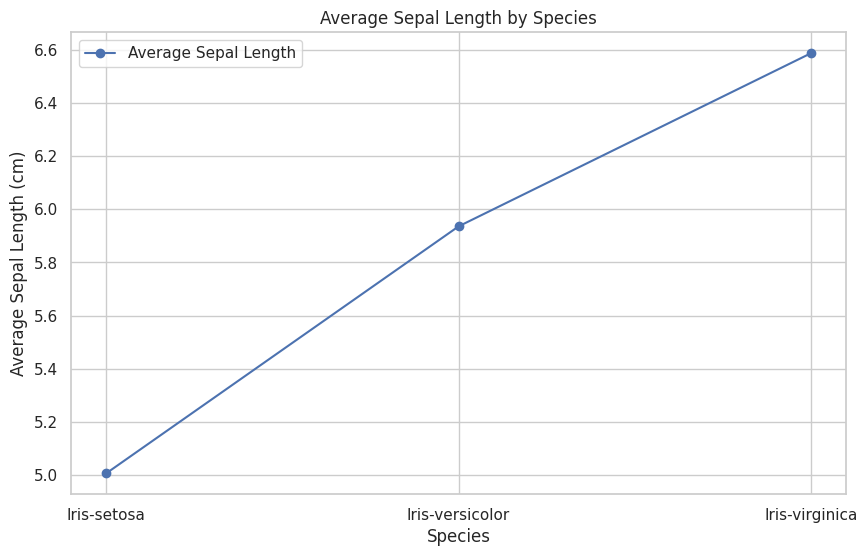

In [26]:
# Task 3.1: Line chart
# Grouping by species and taking the mean
species_mean = df.groupby('Species').mean()

plt.figure(figsize=(10, 6))
plt.plot(species_mean.index, species_mean['SepalLengthCm'], marker='o', label='Average Sepal Length')
plt.title('Average Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Average Sepal Length (cm)')
plt.legend()
plt.show()

<ipython-input-27-8ca181d07b7c>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Species', y='PetalLengthCm', data=df, ci=None, palette='viridis')
<ipython-input-27-8ca181d07b7c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Species', y='PetalLengthCm', data=df, ci=None, palette='viridis')


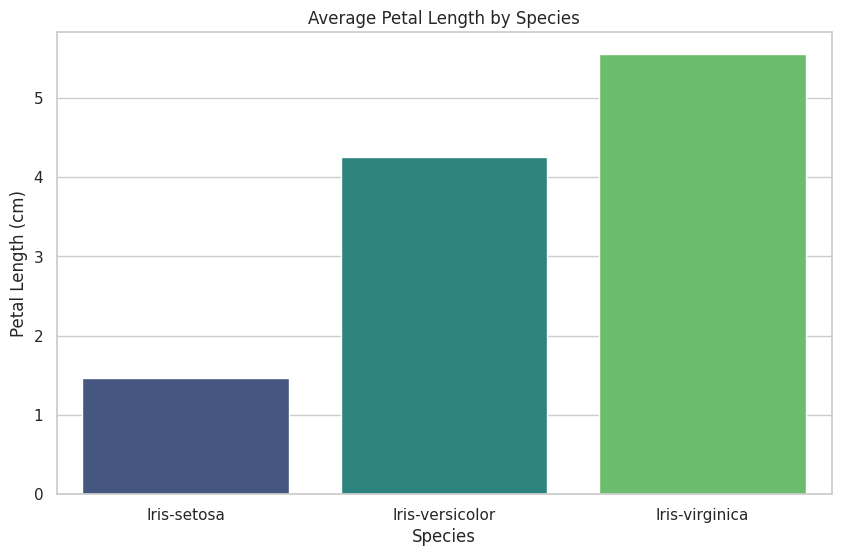

In [27]:
# Task 3.2: Bar chart - Average petal length by species
plt.figure(figsize=(10, 6))
sns.barplot(x='Species', y='PetalLengthCm', data=df, ci=None, palette='viridis')
plt.title('Average Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()

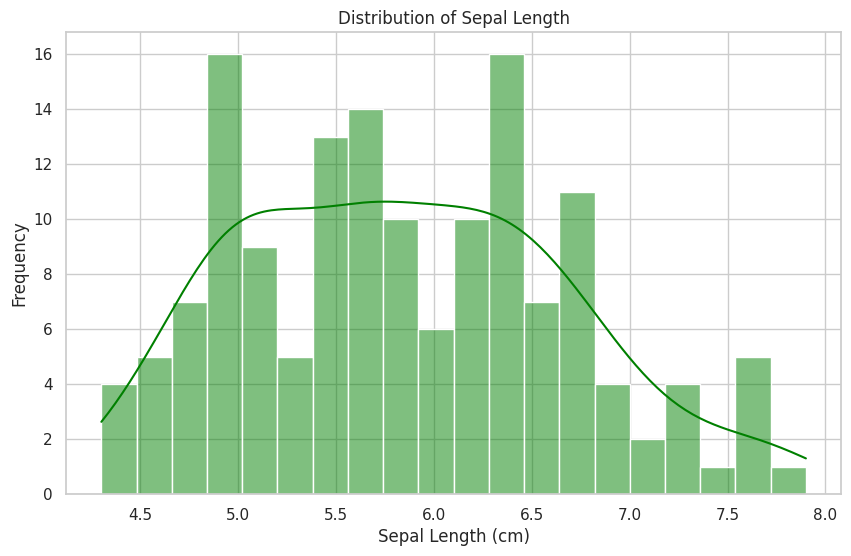

In [28]:
# Task 3.3: Histogram - Distribution of Sepal Length
plt.figure(figsize=(10, 6))
sns.histplot(df['SepalLengthCm'], kde=True, bins=20, color='green')
plt.title('Distribution of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()

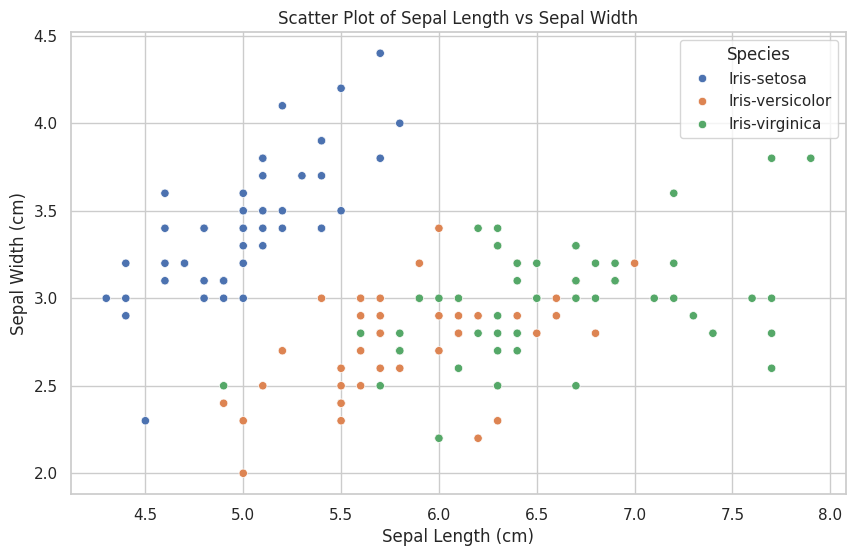

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', palette='deep', data=df)
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species')
plt.show()

link to data: [link text](https://drive.google.com/file/d/1amJEZCBjvDCP8RpkRS5XXbkx9H6IXsKW/view?usp=drive_link)
